In [1]:
!pip install feature-engine
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 6.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 86.7 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.


# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#2a9199; overflow:hidden"><b> ICA - Loan Approval Classification </b></div>
# <div style="text-align:center; padding:5px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:#2a9199; overflow:hidden"><b> Ameer Hamza - E4539328 </b></div>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import time


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC

#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#2a9199; overflow:hidden"><b> Loading the dataset </b></div>

In [3]:
loan = pd.read_csv("/kaggle/input/loan-approval-classification-data/loan_data.csv")

# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#2a9199; overflow:hidden"><b> Understanding Data </b></div>

In [4]:
loan.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [5]:
loan.shape

(45000, 14)

In [6]:
loan.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [8]:
#counting null values
loan.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [9]:
#counting duplicate values
sum(loan.duplicated())

0

In [10]:
loan.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [11]:
# convert age from float to int
loan['person_age'] = loan['person_age'].astype('int')
loan['person_age'].dtypes

dtype('int64')

<div style="padding: 20px; border-color: #c74230; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #c77220;">
    <ul style="font-size: 22px; font-family: 'Arial'; line-height: 1.5em; ">
        <li>The dataset contains a total of 45,000 observations.</li>
        <li>All values in the dataset are non-null.</li>
        <li>There are no duplicate records.</li>
        <li>Dataset consists of 15 columns. No column needs to be dropped.</li>
    </ul>
</div>

# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#2a9199; overflow:hidden"><b> Data Visualization </b></div>

In [12]:
#filter out categorial and numerical values
cat_cols = [var for var in loan.columns if loan[var].dtypes == 'object']
num_cols = [var for var in loan.columns if loan[var].dtypes != 'object']

print(f'Categorical columns: {cat_cols}')
print(f'Numerical columns: {num_cols}')

Categorical columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
Numerical columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']


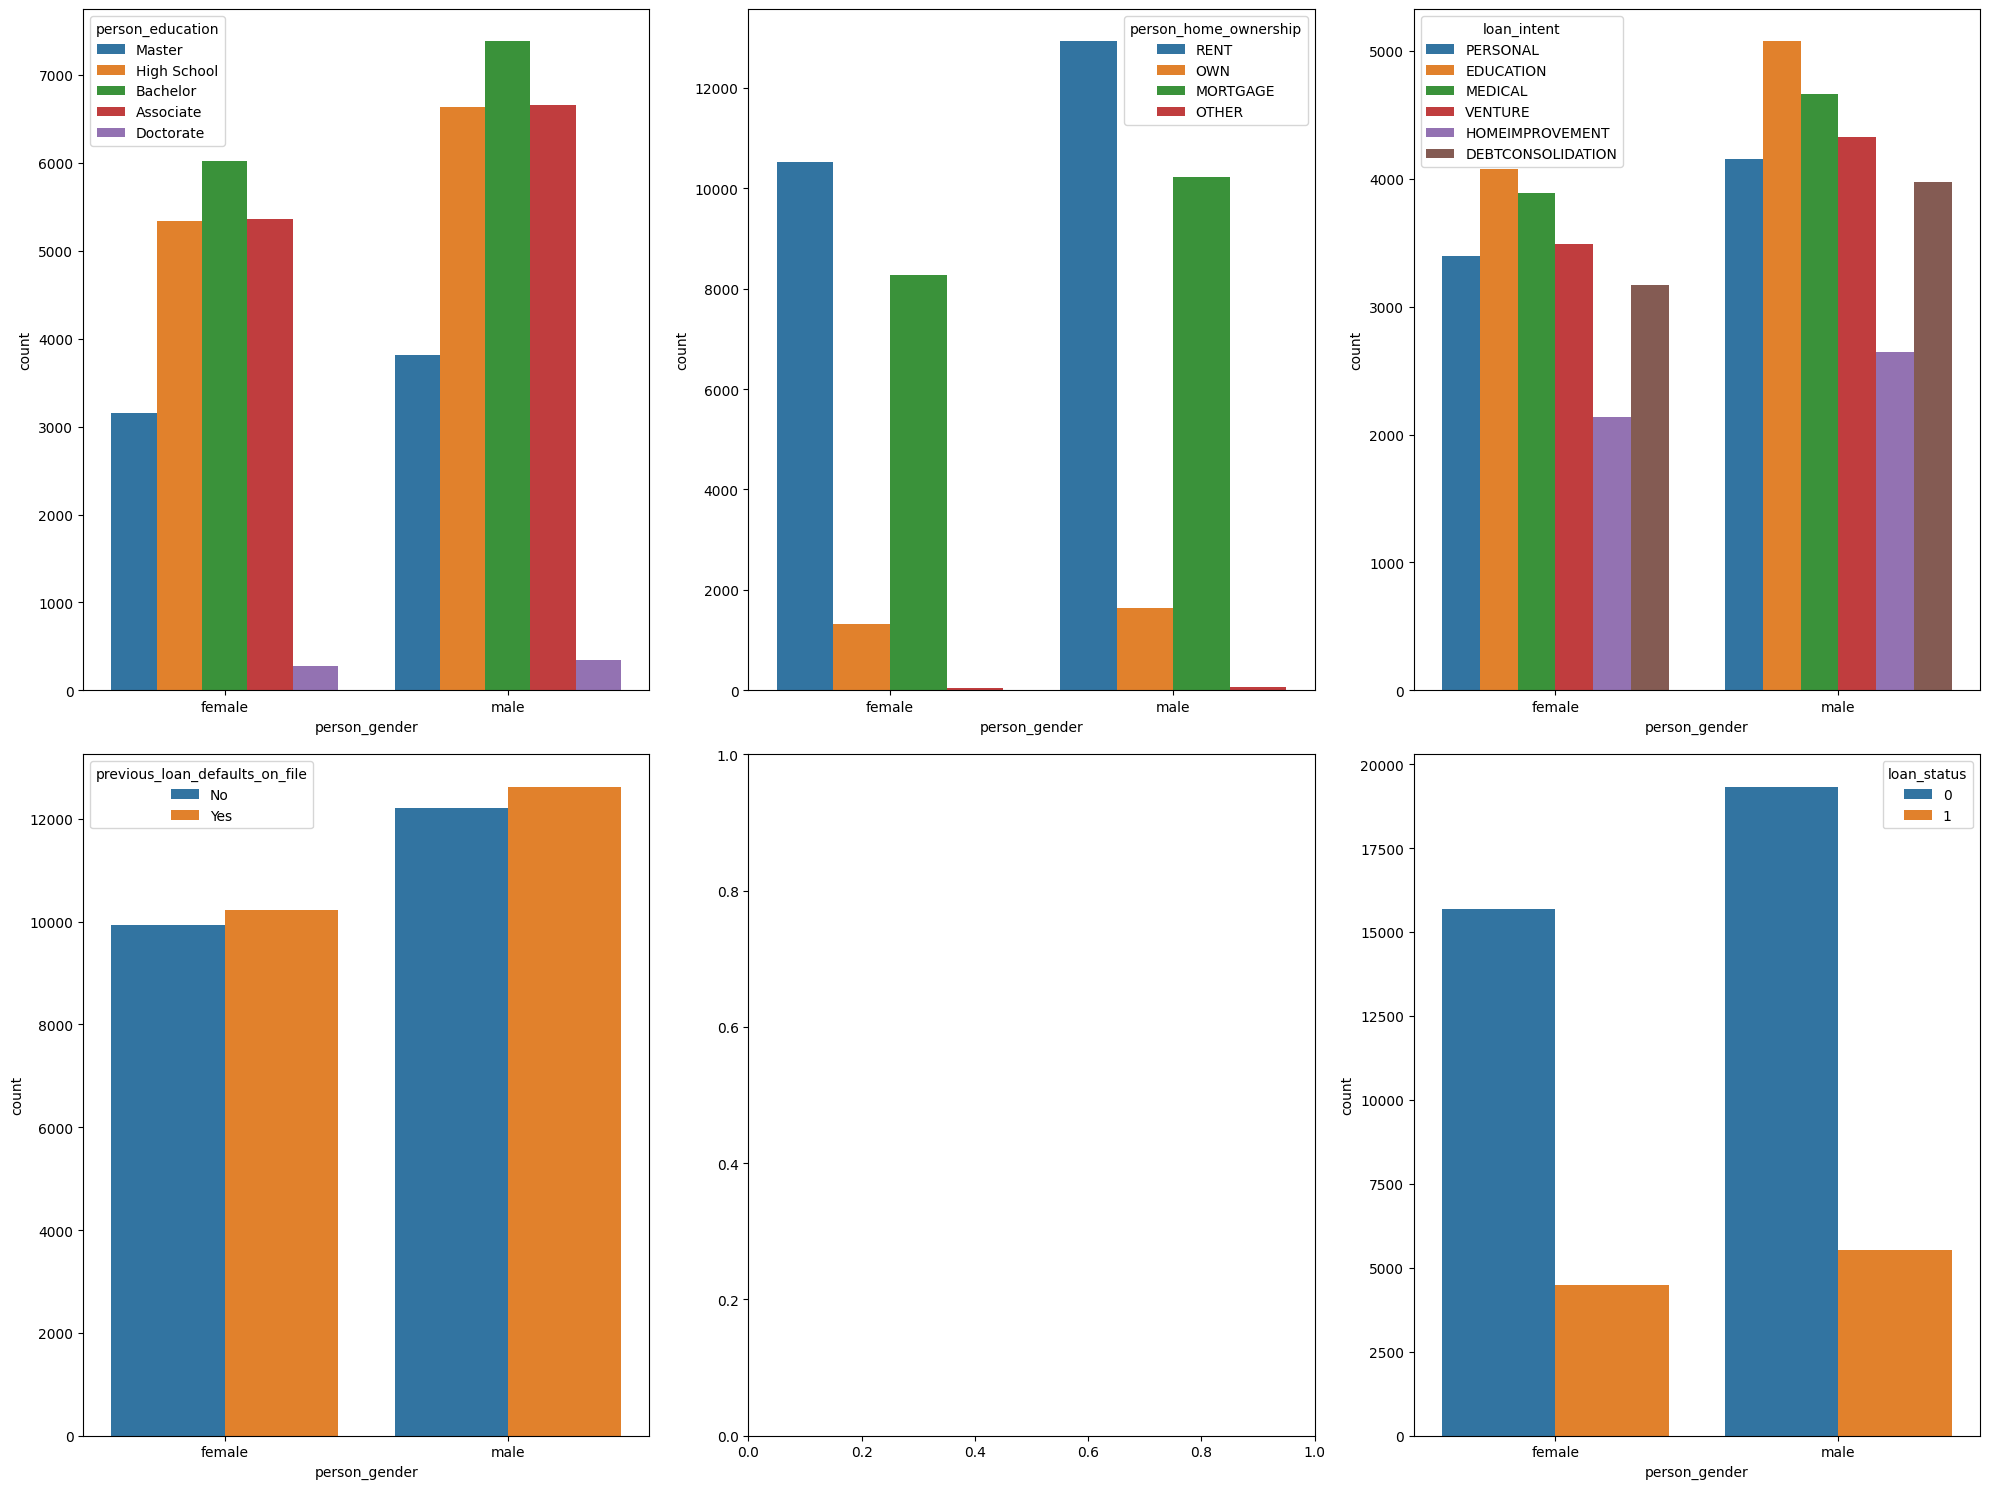

In [13]:
fig, ax = plt.subplots(2, 3, figsize=(20, 15))
# Creating countplots for categorical columns
sns.countplot(x="person_gender", hue="person_education", data=loan, ax=ax[0, 0])
sns.countplot(x="person_gender", hue="person_home_ownership", data=loan, ax=ax[0, 1])
sns.countplot(x="person_gender", hue="loan_intent", data=loan, ax=ax[0, 2])
sns.countplot(x="person_gender", hue="previous_loan_defaults_on_file", data=loan, ax=ax[1, 0])
sns.countplot(x="person_gender", hue="loan_status", data=loan, ax=ax[1, 2])  # Fixed space issue

plt.tight_layout()
plt.show()


In [14]:
loan['person_gender'].value_counts()

person_gender
male      24841
female    20159
Name: count, dtype: int64

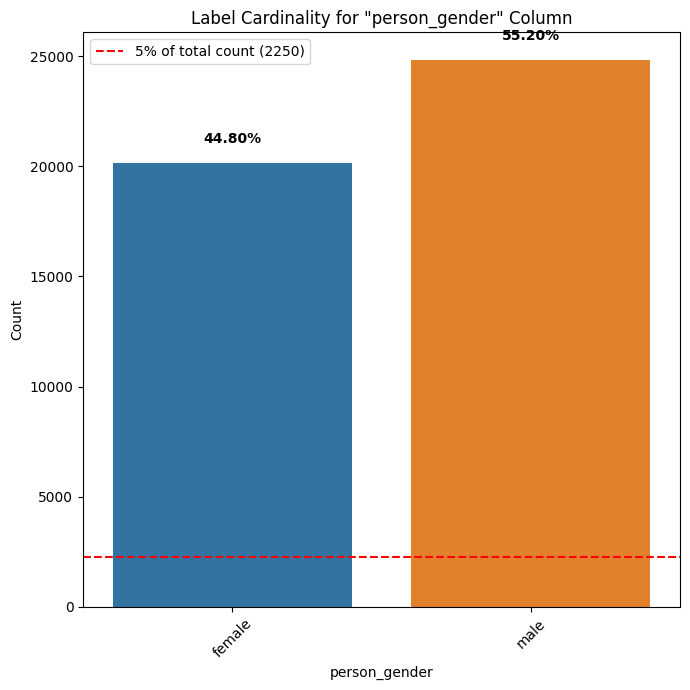

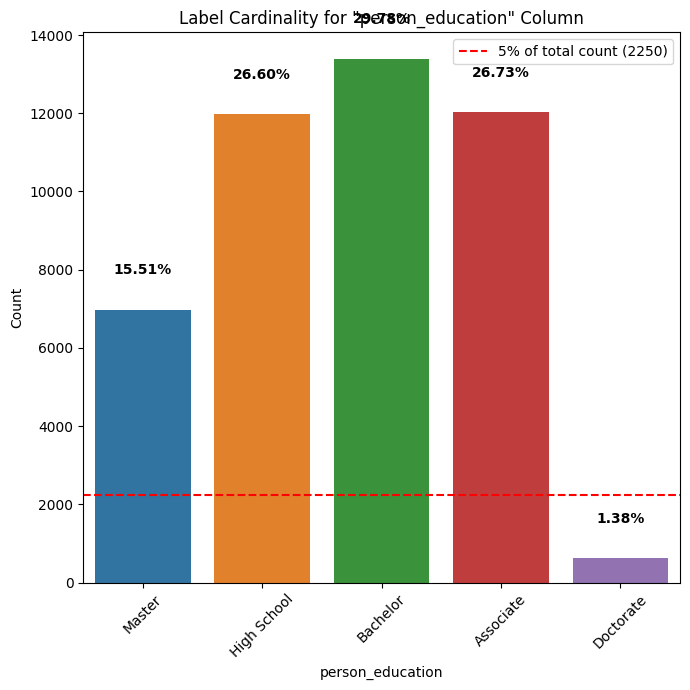

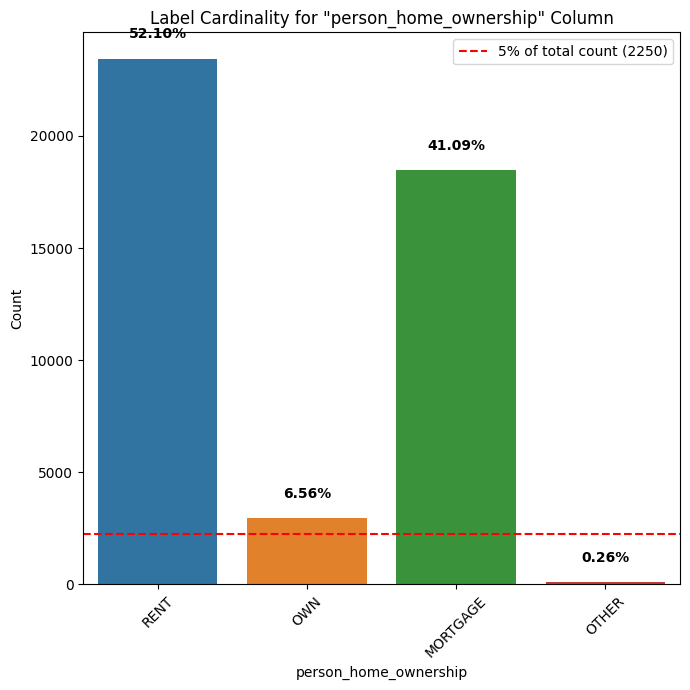

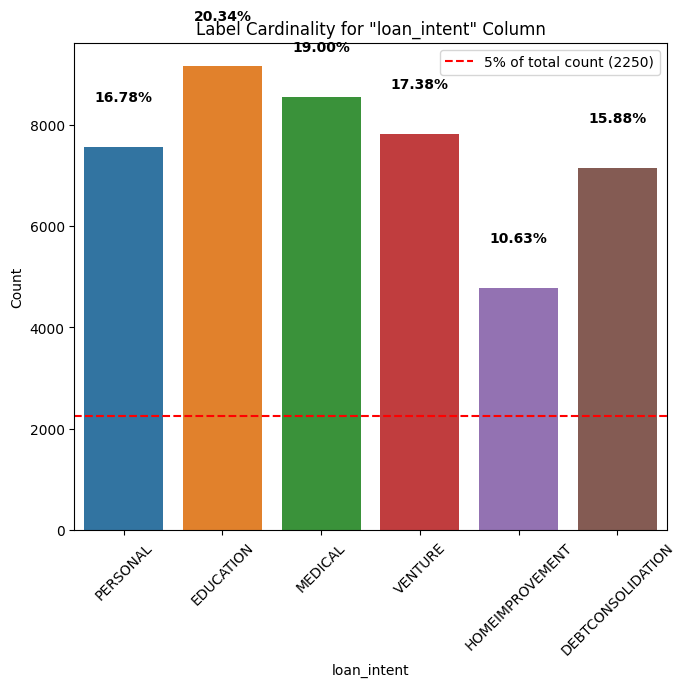

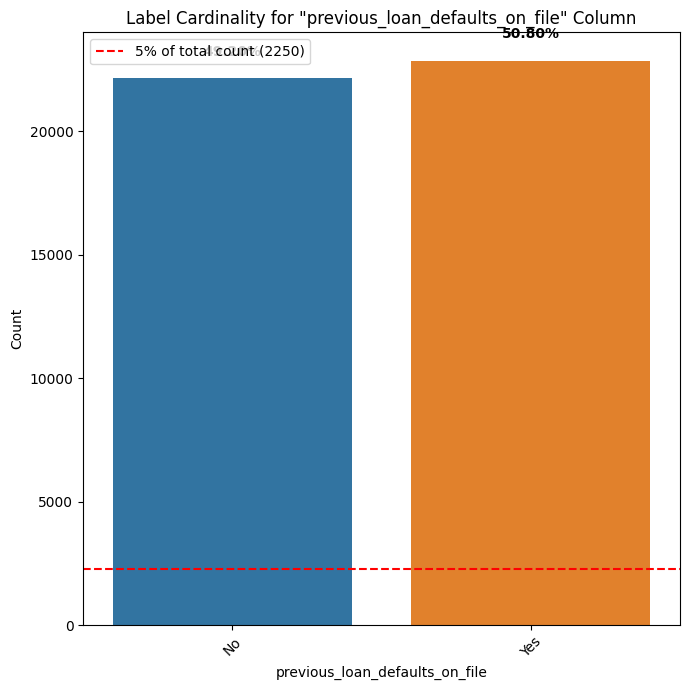

In [15]:
def plot_categorical_column(dataframe, column):

    plt.figure(figsize=(7, 7))
    ax = sns.countplot(x=dataframe[column])
    total_count = len(dataframe[column])
    threshold = 0.05 * total_count
    category_counts = dataframe[column].value_counts(normalize=True) * 100
    ax.axhline(threshold, color='red', linestyle='--', label=f'5% of total count ({threshold:.0f})')
    
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total_count) * 100
        ax.text(p.get_x() + p.get_width() / 2., height + 0.02 * total_count, f'{percentage:.2f}%', ha="center", fontsize=10, fontweight="bold")

    plt.title(f'Label Cardinality for "{column}" Column')
    plt.ylabel('Count')
    plt.xlabel(column)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.legend()
    plt.show()

for col in cat_cols:
    plot_categorical_column(loan, col)


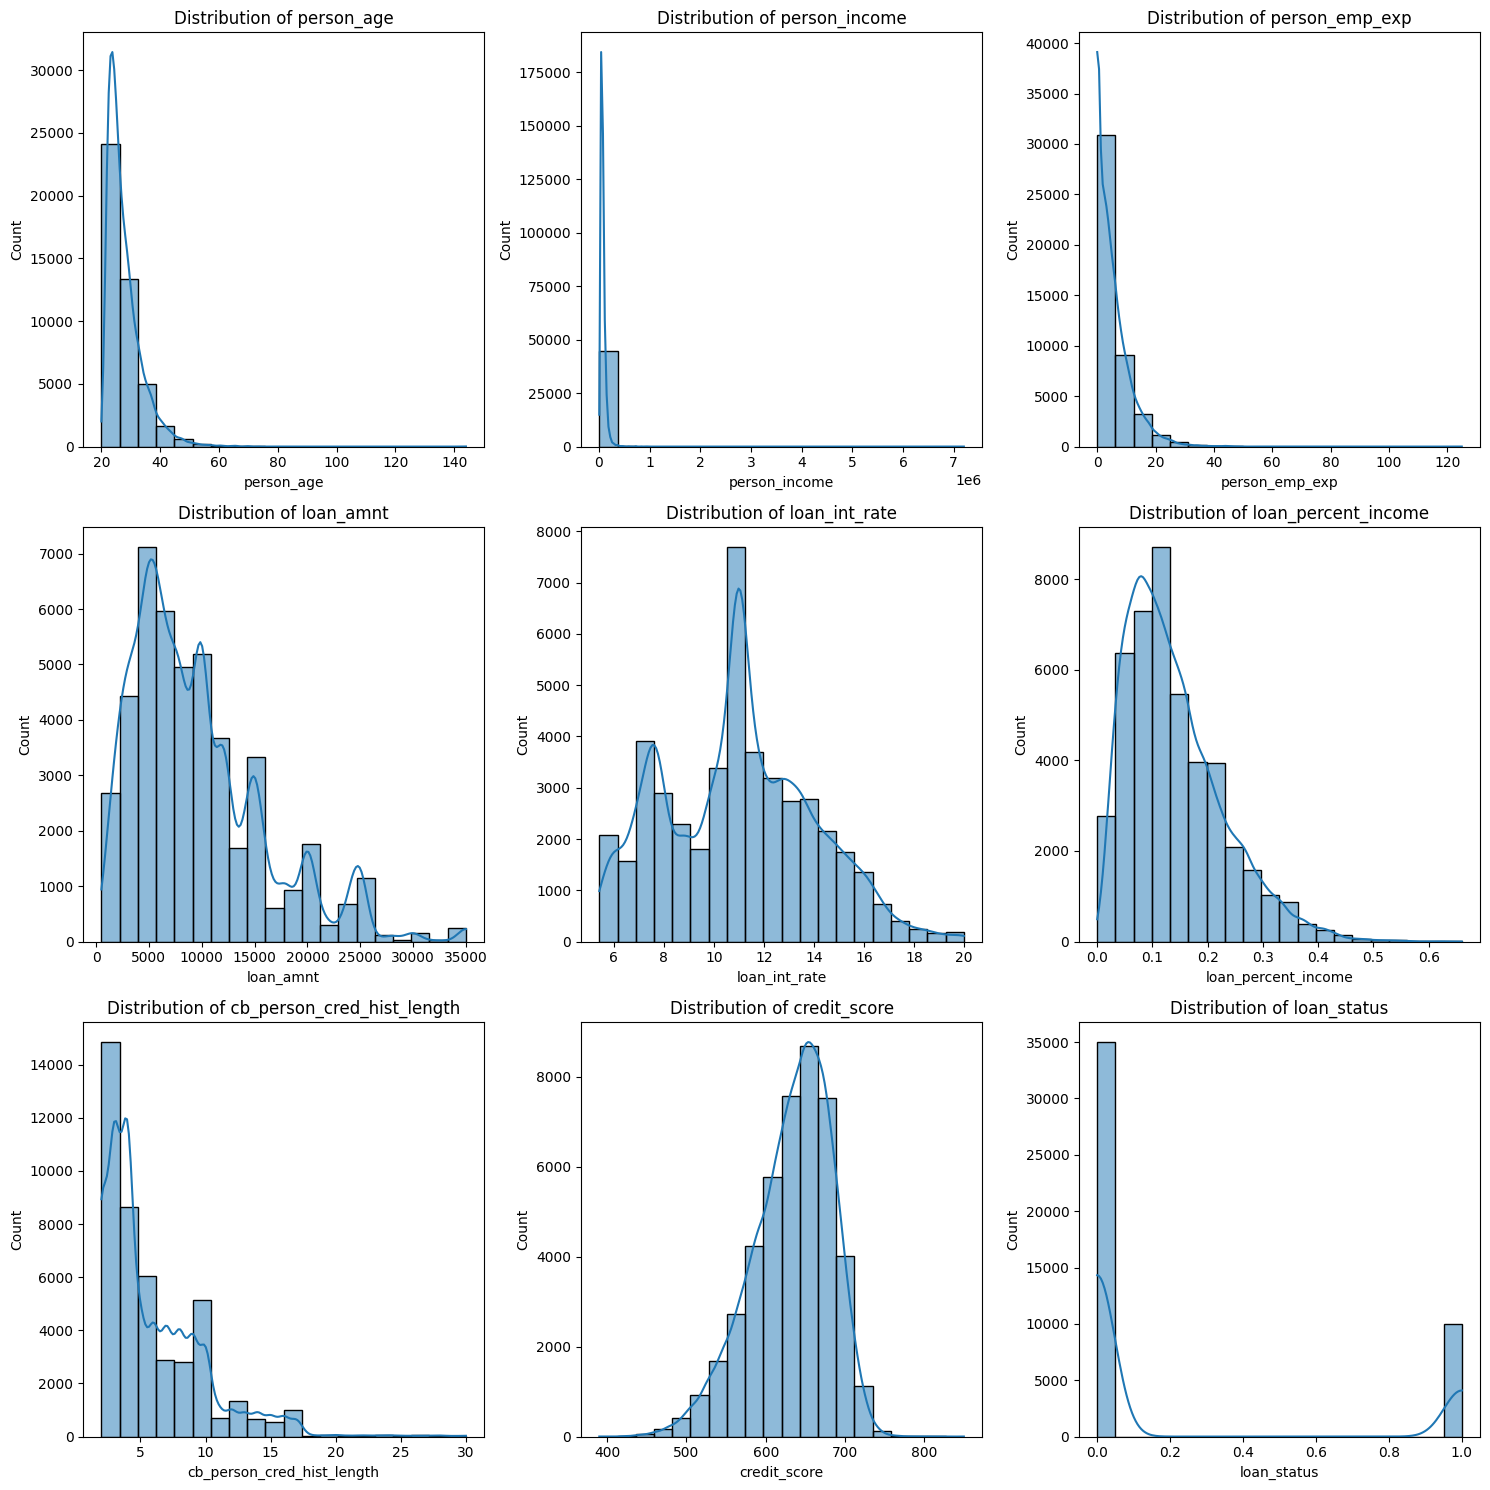

In [16]:
# Plot histogram for each numerical column

num_plots = len(num_cols)
ncols = 3  # You can adjust the number of columns for the layout
nrows = (num_plots + ncols - 1) // ncols  # Calculate the number of rows needed

# Create a single figure with subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 5, nrows * 5))

# Flatten axes array for easier indexing
axes = axes.flatten()

# Loop over each column and plot the histogram
for i, column in enumerate(num_cols):
    sns.histplot(data=loan, x=column, kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Hide unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

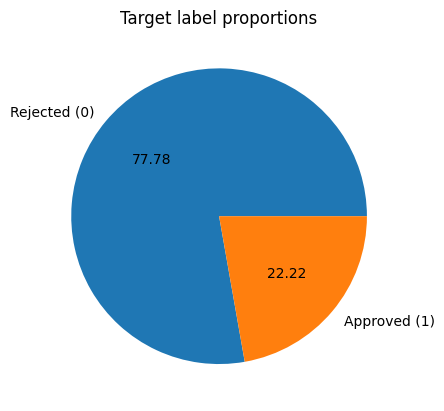

In [17]:
label_prop = loan['loan_status'].value_counts()

plt.pie(label_prop.values, labels=['Rejected (0)', 'Approved (1)'], autopct='%.2f')
plt.title('Target label proportions')
plt.show()

# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#2a9199; overflow:hidden"><b> Data Pre-Processing </b></div>

In [18]:
skewed_cols = ['person_age', 'person_income', 'person_emp_exp',
               'loan_amnt', 'loan_percent_income',
               'cb_person_cred_hist_length', 'credit_score']

normal_cols= ['loan_int_rate']

In [19]:
ss = StandardScaler()

loan[skewed_cols] = ss.fit_transform(loan[skewed_cols])
loan[skewed_cols] = ss.transform(loan[skewed_cols])

In [20]:
loan['person_education'].value_counts()

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

In [21]:
unique_values = loan['person_education'].unique()

print(unique_values)

['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']


In [22]:
loan['person_education'] = loan['person_education'].replace({
    'High School': 0,
    'Associate': 1,
    'Bachelor': 2,
    'Master': 3,
    'Doctorate':  4
})

In [23]:
loan['person_gender'].value_counts()

person_gender
male      24841
female    20159
Name: count, dtype: int64

In [24]:
loan['person_home_ownership'].value_counts()

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

In [25]:
loan['loan_intent'].value_counts()

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

In [26]:
loan["previous_loan_defaults_on_file"].value_counts()

previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64

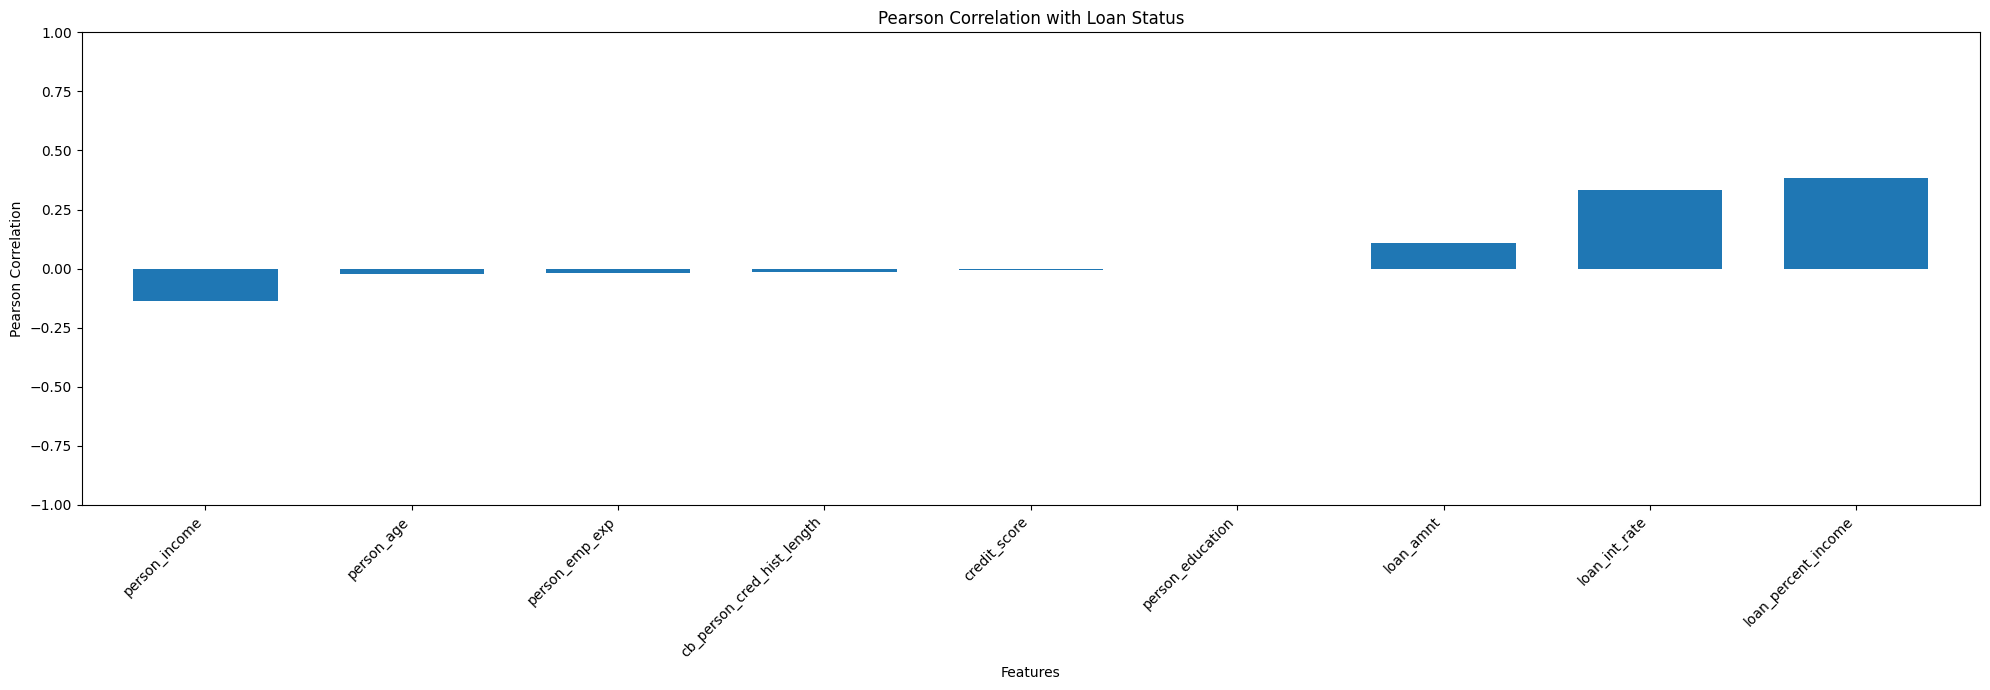

In [27]:
# Compute Pearson correlation coefficients
correlations = loan.corr(numeric_only=True)['loan_status'][:-1].sort_values()

# Set the size of the figure
plt.figure(figsize=(20, 7))

# Create a bar plot of the Pearson correlation coefficients
ax = correlations.plot(kind='bar', width=0.7)

# Set the y-axis limits and labels
ax.set(ylim=[-1, 1], ylabel='Pearson Correlation', xlabel='Features', 
       title='Pearson Correlation with Loan Status')

# Rotate x-axis labels for better readability
ax.set_xticklabels(correlations.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [28]:
#converting categorical values in numberical values
gender_mapping = {'male': 0, 'female': 1}
home_ownership_mapping = {'RENT': 0, 'OWN': 1, 'MORTGAGE': 2, 'OTHER': 3}
loan_intent_mapping = {'PERSONAL': 0, 'EDUCATION': 1, 'MEDICAL': 2, 'VENTURE': 3, 'HOMEIMPROVEMENT': 4, 'DEBTCONSOLIDATION': 5}
previous_loan_defaults_mapping = {'No': 0, 'Yes': 1}

loan['person_gender'] = loan['person_gender'].map(gender_mapping)
loan['person_home_ownership'] = loan['person_home_ownership'].map(home_ownership_mapping)
loan['loan_intent'] = loan['loan_intent'].map(loan_intent_mapping)
loan['previous_loan_defaults_on_file'] = loan['previous_loan_defaults_on_file'].map(previous_loan_defaults_mapping)

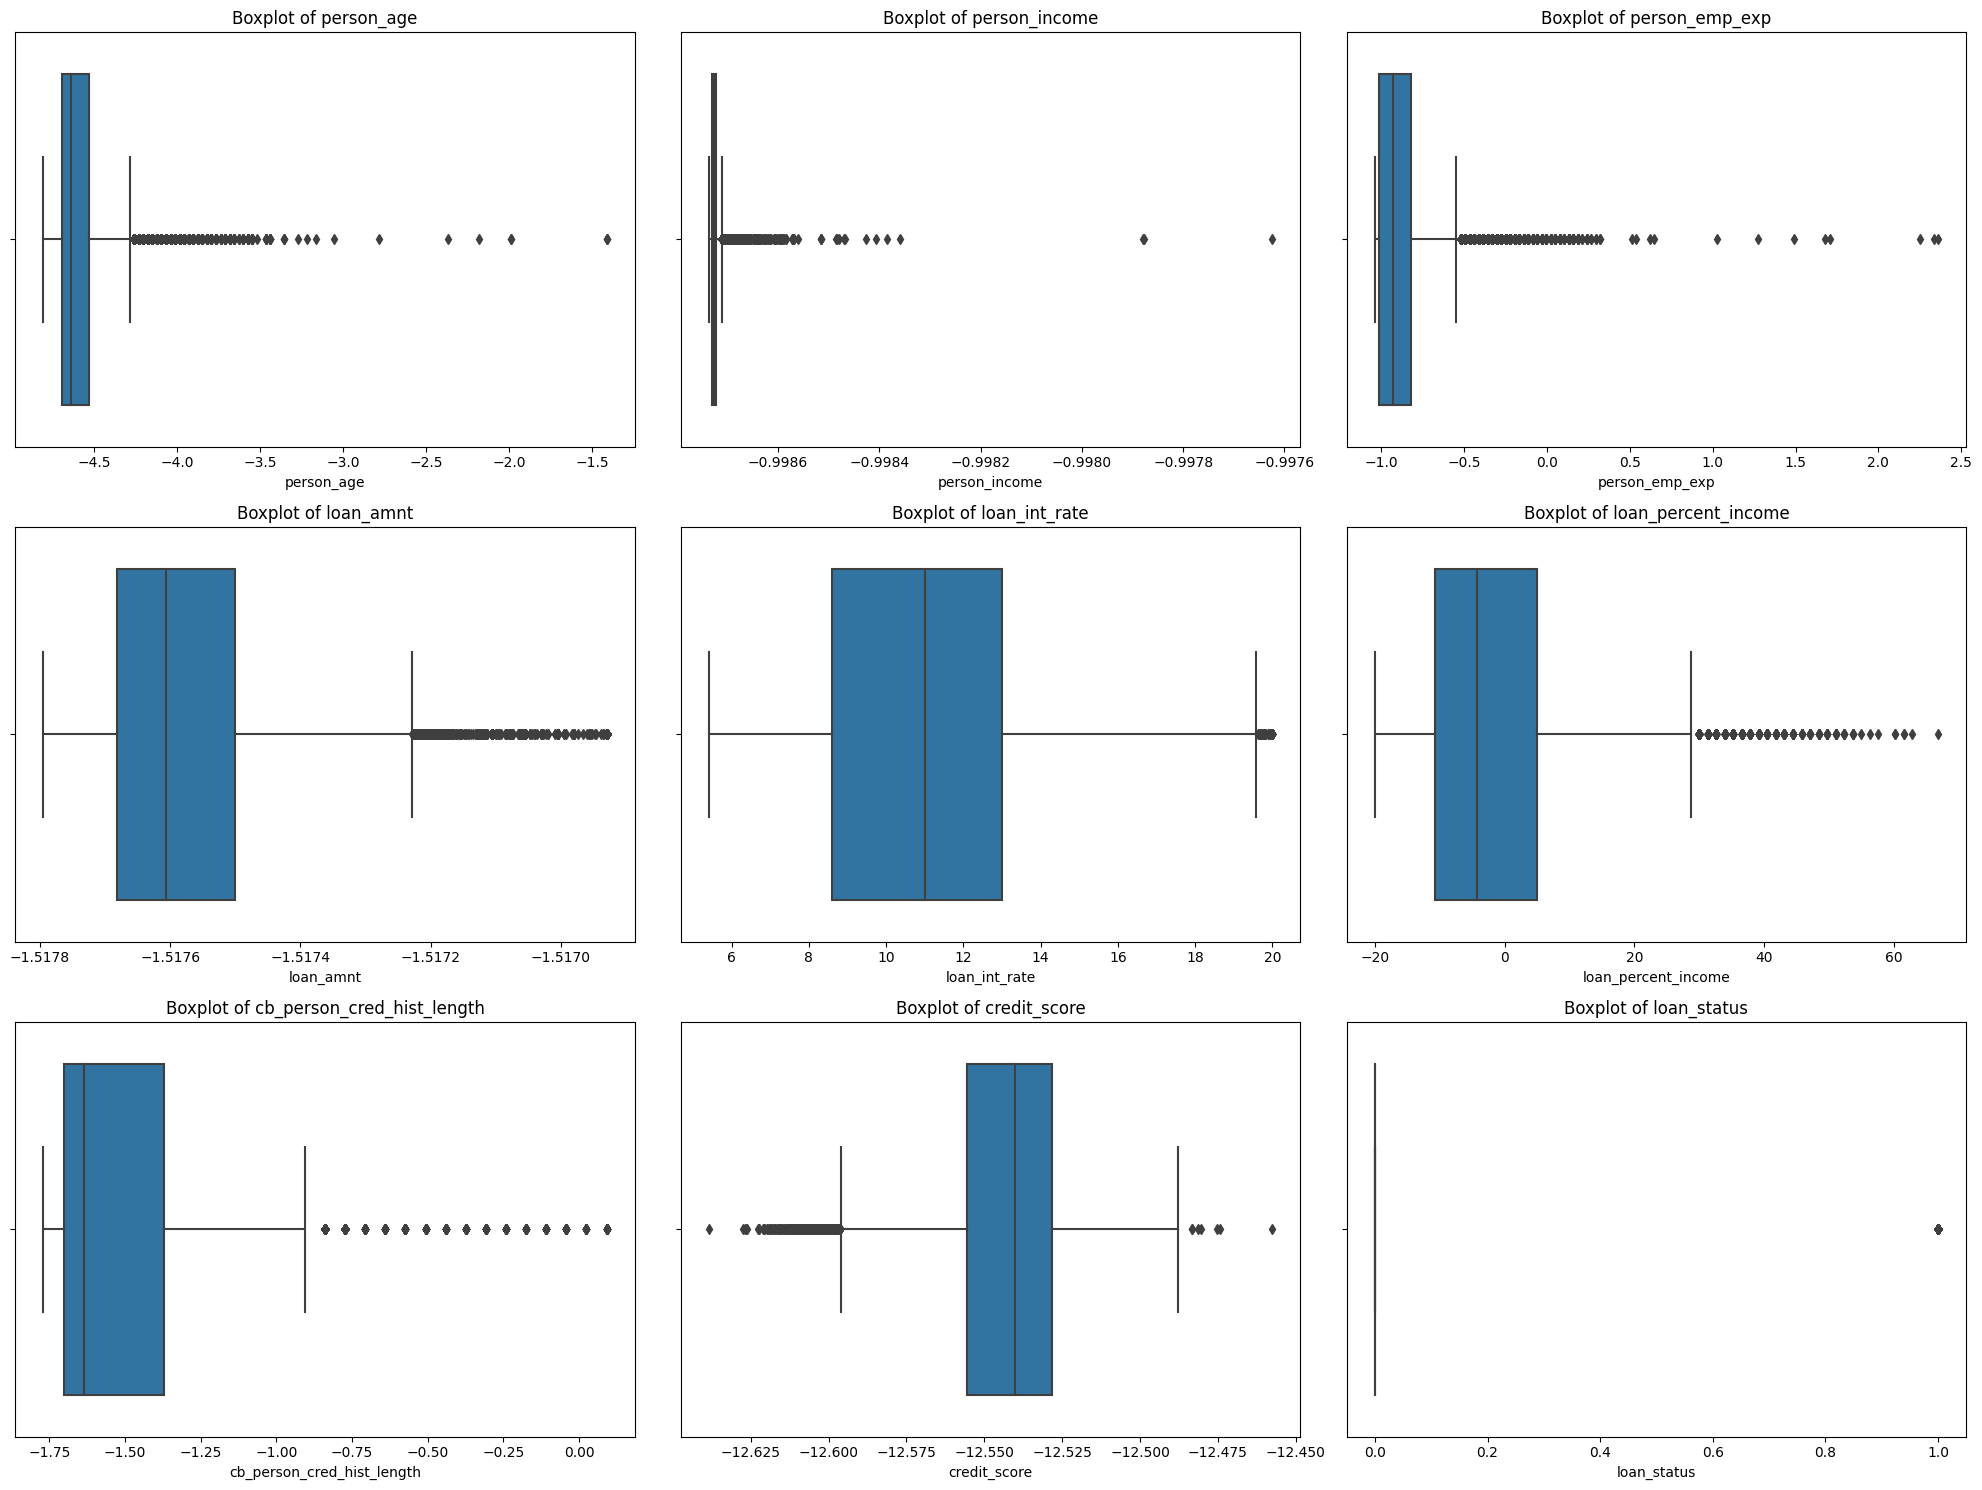

In [29]:
# Define number of columns per row
cols_per_row = 3  
num_plots = len(num_cols)  
rows = math.ceil(num_plots / cols_per_row)  # Calculate required rows

# Create subplots dynamically
fig, ax = plt.subplots(rows, cols_per_row, figsize=(20, rows * 5))
ax = ax.flatten()  # Flatten in case of multiple rows

# Loop through all numerical columns and plot boxplots
for idx, col in enumerate(num_cols):
    sns.boxplot(ax=ax[idx], x=loan[col])
    ax[idx].set_title(f'Boxplot of {col}')

# Hide empty subplots (if any)
for i in range(idx + 1, len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

In [30]:
# Calculate the Z-scores for numerical columns
z_scores = stats.zscore(loan[num_cols])

# Convert to DataFrame
z_scores_df = pd.DataFrame(z_scores, columns=num_cols)

# Generate descriptive statistics
z_scores_df.describe().round(3)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000,45000.000,45000.000,45000.000,45000.000,45000.000,45000.000,45000.000,45000.000
mean,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.284,-0.899,-0.892,-1.438,-1.875,-1.602,-0.997,-4.810,-0.535
25%,-0.623,-0.412,-0.727,-0.726,-0.811,-0.799,-0.739,-0.627,-0.535
50%,-0.292,-0.165,-0.233,-0.251,0.001,-0.226,-0.481,0.147,-0.535
75%,0.370,0.192,0.427,0.420,0.666,0.576,0.550,0.741,-0.535
max,19.228,88.539,19.723,4.025,3.019,5.966,6.220,4.310,1.871


In [31]:
#removing outliers

from feature_engine.outliers import OutlierTrimmer

trimmer = OutlierTrimmer(capping_method='iqr', tail='right', variables = ['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt',
       'loan_intent', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file'])

loan_2 = trimmer.fit_transform(loan)


In [32]:
print(loan_2.columns)

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')


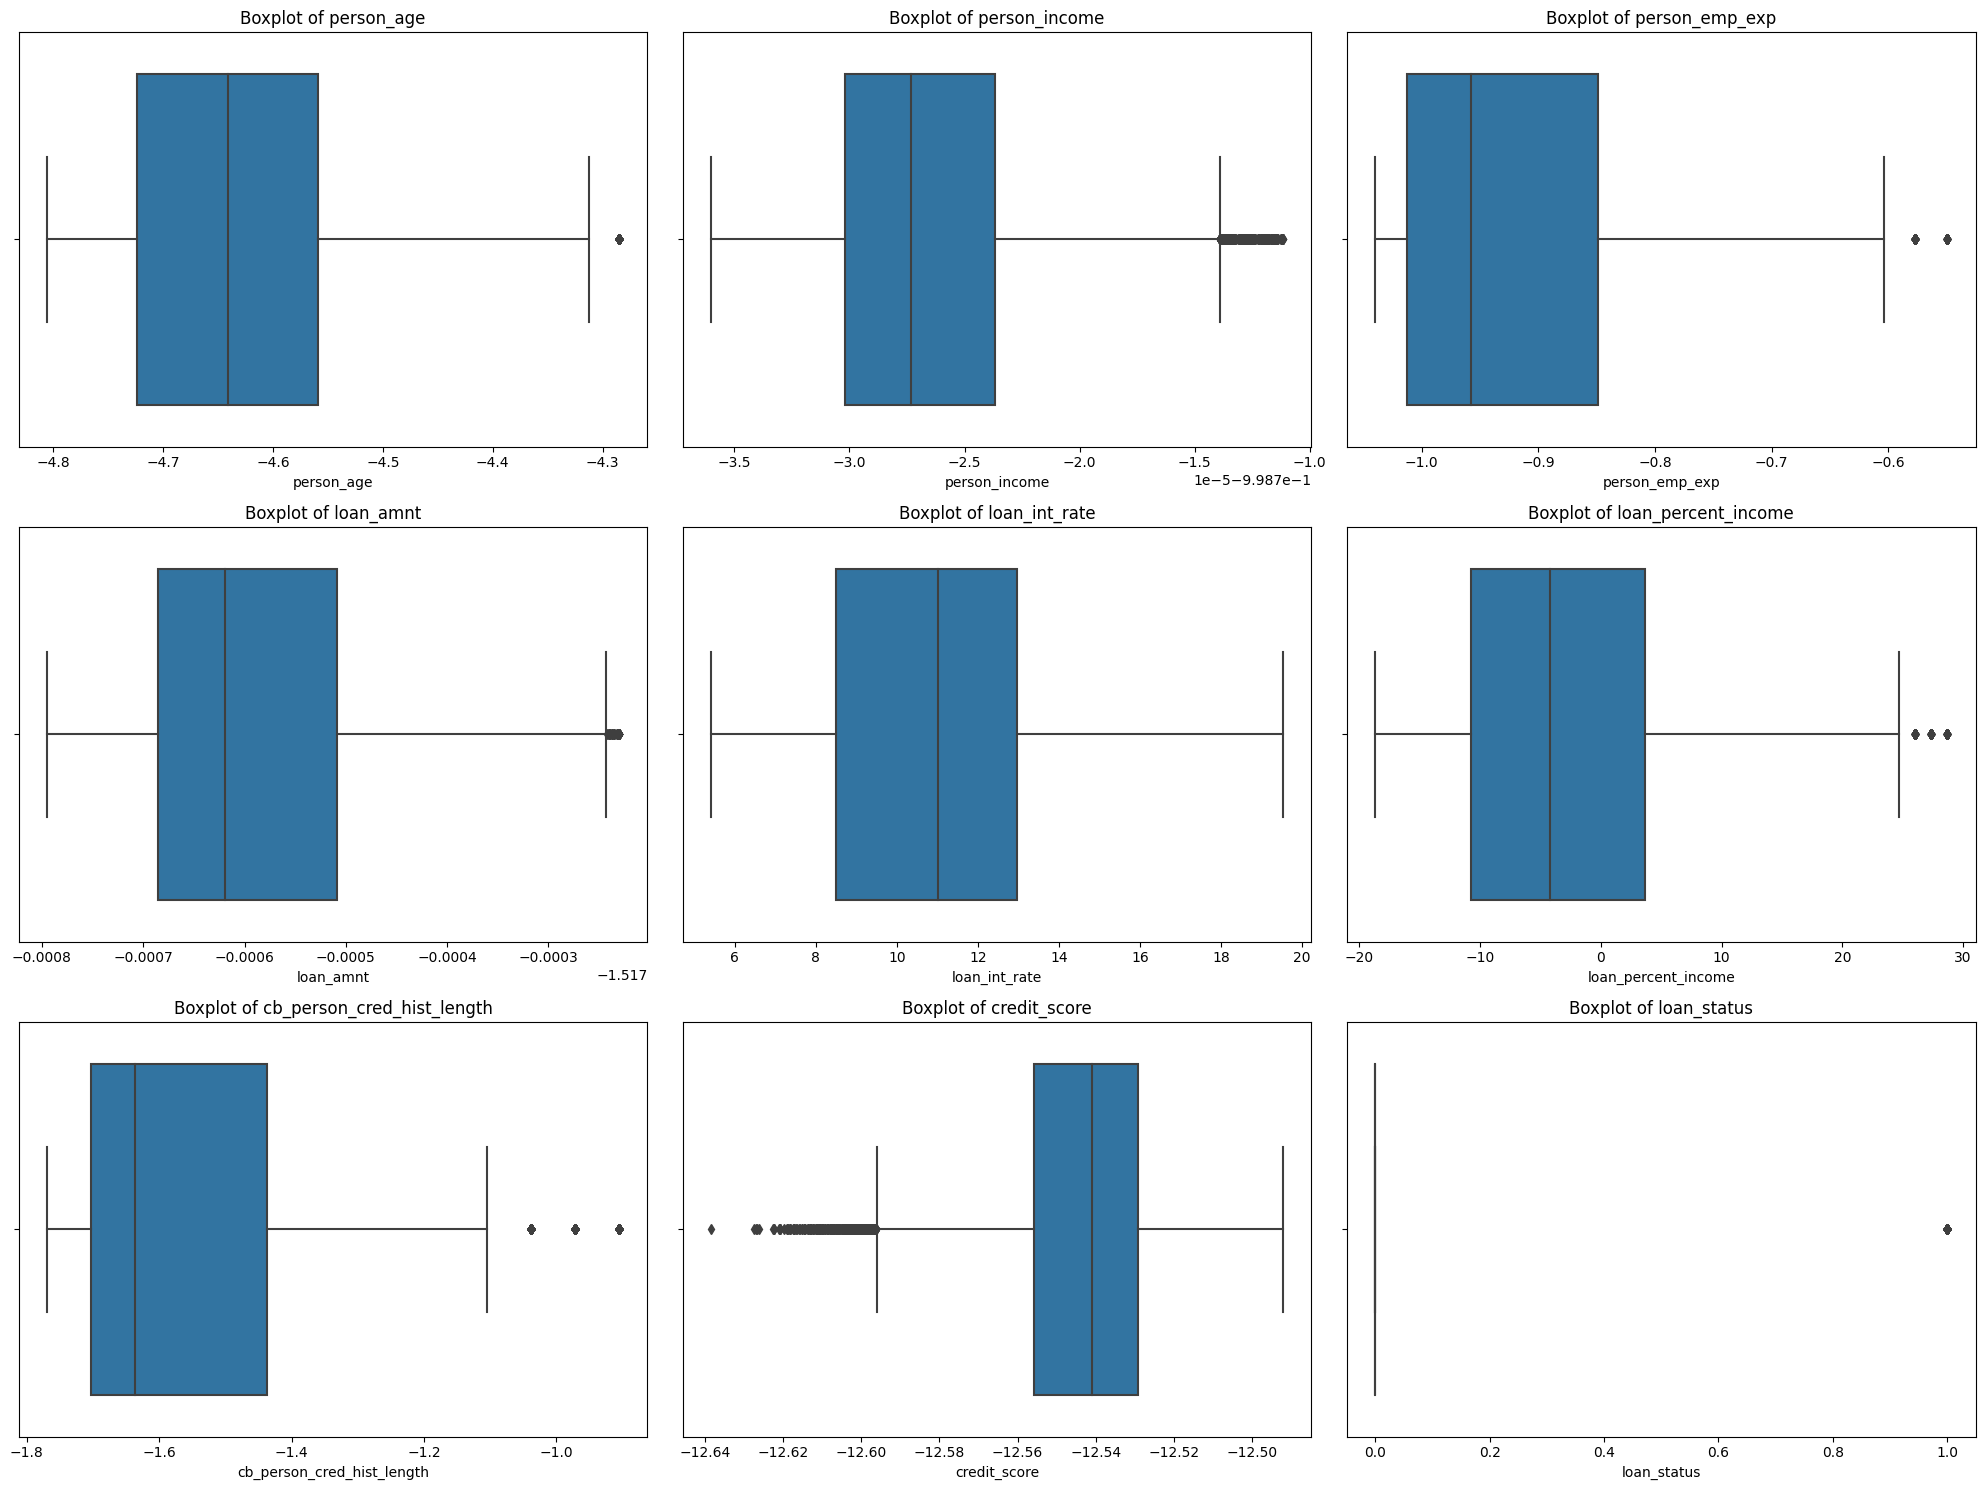

In [33]:
# Define number of columns per row
cols_per_row = 3  
num_plots = len(num_cols)  
rows = math.ceil(num_plots / cols_per_row)  # Calculate required rows

# Create subplots dynamically
fig, ax = plt.subplots(rows, cols_per_row, figsize=(20, rows * 5))
ax = ax.flatten()  # Flatten in case of multiple rows

# Loop through all numerical columns and plot boxplots
for idx, col in enumerate(num_cols):
    sns.boxplot(ax=ax[idx], x=loan_2[col])
    ax[idx].set_title(f'Boxplot of {col}')

# Hide empty subplots (if any)
for i in range(idx + 1, len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

<div style="padding: 20px; border-color: #c74230; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #c77220;">
    <ul style="font-size: 22px; font-family: 'Arial'; line-height: 1.5em; ">
        <li>Outliers Significantly Removed</li>
    </ul>
</div>

In [34]:
# Calculate the Z-scores for numerical columns
z_scores = stats.zscore(loan_2[num_cols])

# Convert to DataFrame
z_scores_df = pd.DataFrame(z_scores, columns=num_cols)

# Generate descriptive statistics
z_scores_df.describe().round(3)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,37954.000,37954.000,37954.000,37954.000,37954.000,37954.000,37954.000,37954.000,37954.000
mean,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.607,-1.949,-1.032,-1.627,-1.872,-1.612,-1.094,-4.811,-0.520
25%,-0.876,-0.760,-0.790,-0.728,-0.823,-0.832,-0.748,-0.616,-0.520
50%,-0.146,-0.177,-0.306,-0.189,0.039,-0.183,-0.403,0.143,-0.520
75%,0.585,0.574,0.661,0.720,0.708,0.596,0.633,0.742,-0.520
max,3.020,3.133,3.323,2.995,2.950,3.064,3.396,2.620,1.925


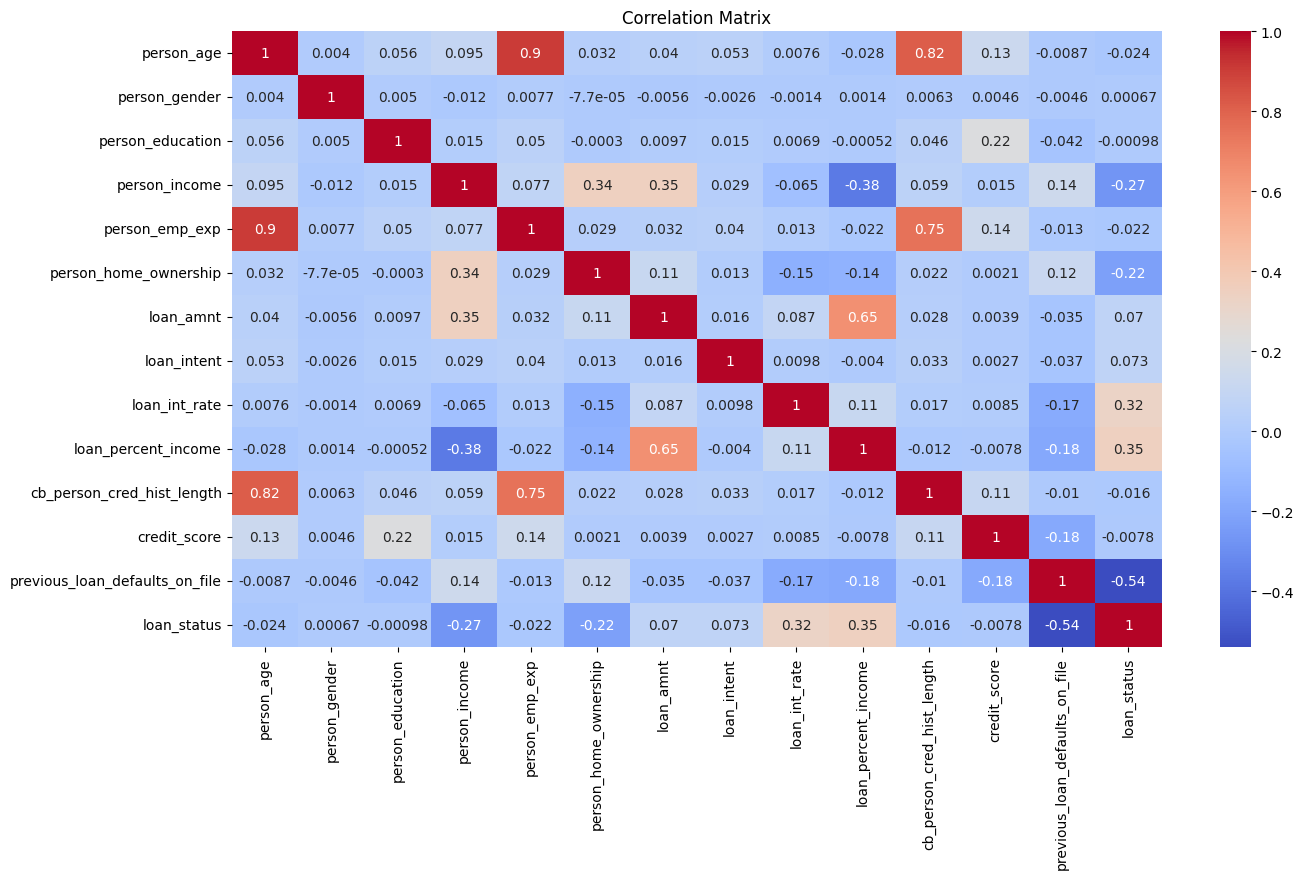

In [35]:
plt.figure(figsize=(15, 8))
sns.heatmap(loan_2.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [36]:
# Calculate the correlation with the Loan Status and find the strongest correlation
loan_status_corr = loan_2.corr(numeric_only=True)['loan_status'].drop('loan_status')
strongest_correlation = loan_status_corr.idxmax()
strongest_correlation_value = loan_status_corr.max()

print(f"The strongest correlation with the loan_status is {strongest_correlation} with a value of {strongest_correlation_value:.2f}")

The strongest correlation with the loan_status is loan_percent_income with a value of 0.35


In [37]:
# check for co-relation that have greater than 0.1

threshold = 0.1

correlation_matrix = loan_2.corr()
high_corr_features = correlation_matrix.index[abs(correlation_matrix["loan_status"]) > threshold].tolist()
high_corr_features.remove("loan_status")
print(high_corr_features)

X_selected = loan[high_corr_features]
Y = loan["loan_status"]

['person_income', 'person_home_ownership', 'loan_int_rate', 'loan_percent_income', 'previous_loan_defaults_on_file']


In [38]:
print(loan_2.columns)

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')


In [39]:
# Drop unnecessary column from the DataFrame
loan_2.drop(['person_age'], axis=1, inplace=True)

loan_2.shape

(37954, 13)

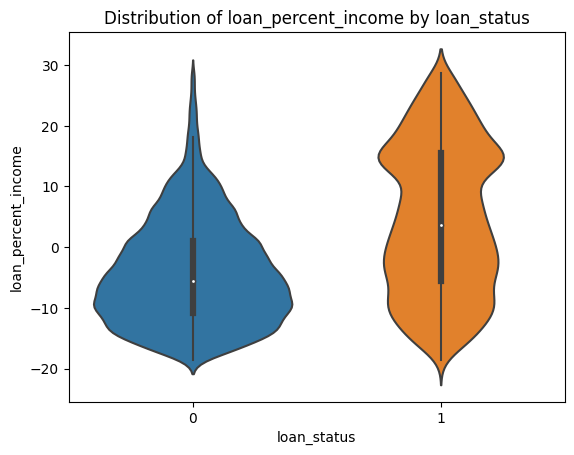

In [40]:
sns.violinplot(data=loan_2, x='loan_status', y='loan_percent_income')        
plt.title(f'Distribution of loan_percent_income by loan_status')
plt.show()

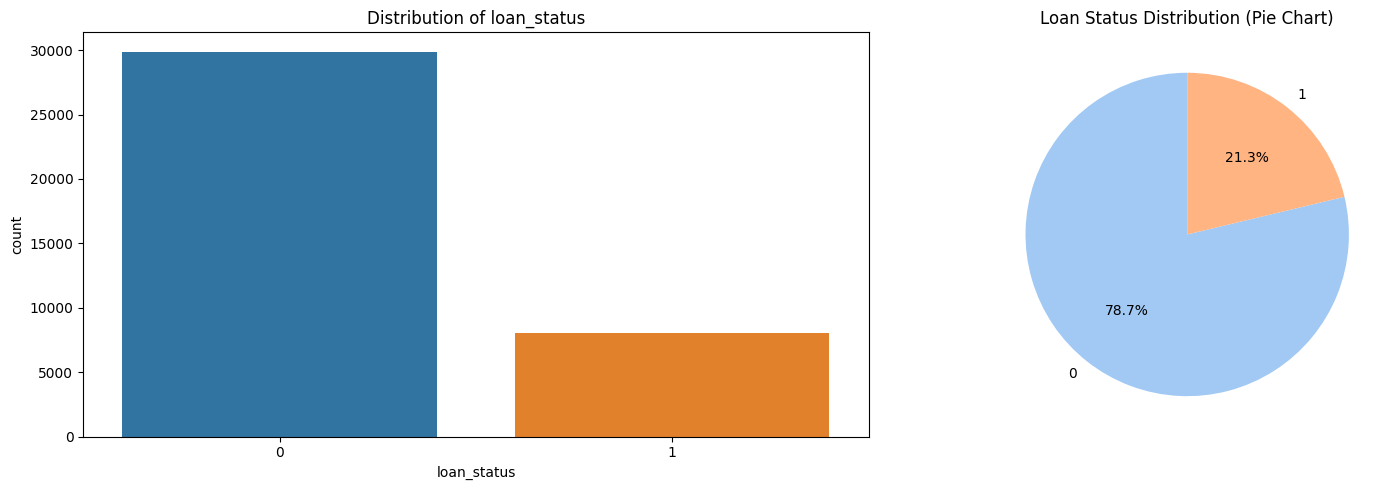

In [41]:
# Set custom labels
labels = ["0", "1"]
ticks = range(len(labels))

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot the count plot on the first subplot
sns.countplot(data=loan_2, x='loan_status', ax=axes[0])
axes[0].set_title('Distribution of loan_status')
axes[0].set_xticks(ticks)
axes[0].set_xticklabels(labels)

# Calculate counts for the pie chart
loan_counts = loan_2['loan_status'].value_counts().sort_index()

# Plot the pie chart on the second subplot
axes[1].pie(loan_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
axes[1].set_title('Loan Status Distribution (Pie Chart)')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


In [42]:
# Separate features and target variable
X = loan_2.drop(columns=['loan_status'])
y = loan_2['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.3, random_state=101, stratify=Y)


In [43]:
np.unique(y_train, return_counts=True)


(array([0, 1]), array([24500,  7000]))

In [44]:
# Apply SMOTE to balance the training set
smote = SMOTE(sampling_strategy=1, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the shape of the resampled training data
print(f"Original training set shape: {X_train.shape}")
print(f"Resampled training set shape: {X_train_resampled.shape}")

Original training set shape: (31500, 5)
Resampled training set shape: (49000, 5)


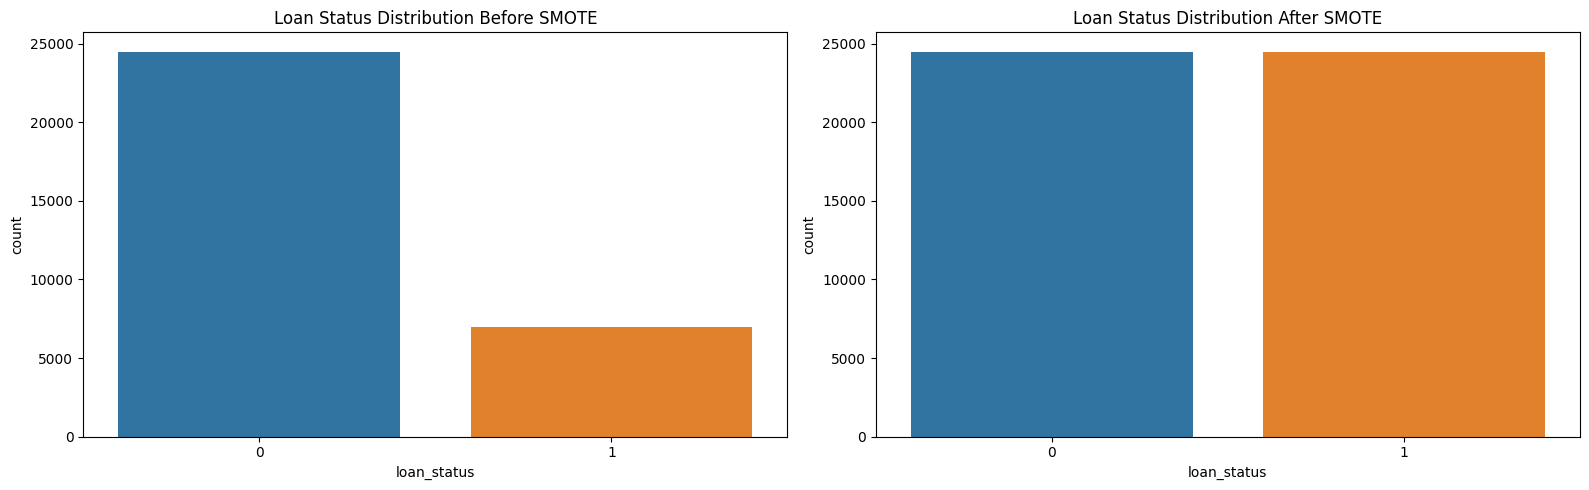

In [45]:
# Count the distribution of loan status before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot the distribution of loan status before SMOTE (on the left)
sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title('Loan Status Distribution Before SMOTE')

# Plot the distribution of loan status after SMOTE (on the right)
sns.countplot(x=y_train_resampled, ax=axes[1])
axes[1].set_title('Loan Status Distribution After SMOTE')

plt.tight_layout()
plt.show()

In [46]:
loan_2.head()

,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,1,0,-0.998735,-1.039442,1,-1.517782,1,11.14,-9.454668,-1.769319,-12.593534,1,0
5,1,0,-0.998735,-1.039442,1,-1.517745,3,7.14,5.007945,-1.769319,-12.582527,0,1
9,1,0,-0.998735,-1.039442,1,-1.517767,3,14.74,-2.880753,-1.702881,-12.540069,0,1
11,1,1,-0.998735,-1.039442,1,-1.517695,4,8.63,24.729691,-1.769319,-12.535745,0,1
19,1,3,-0.998735,-1.012242,2,-1.517763,1,10.99,-4.195536,-1.769319,-12.524737,0,1


<div style="padding: 20px; border-color: #c74230; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #c77220;">
    <ul style="font-size: 22px; font-family: 'Arial'; line-height: 1.5em; ">
        <li>Dataset is sooo imbalanced.... :(</li>
    </ul>
</div>

# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#2a9199; overflow:hidden"><b> Model Training </b></div>

In [47]:
# Instantiate classification models with default parameters
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
}


Decision Tree accuracy: 0.88
Random Forest accuracy: 0.90
K-Nearest Neighbors accuracy: 0.86
Logistic Regression accuracy: 0.83
Support Vector Machine accuracy: 0.82


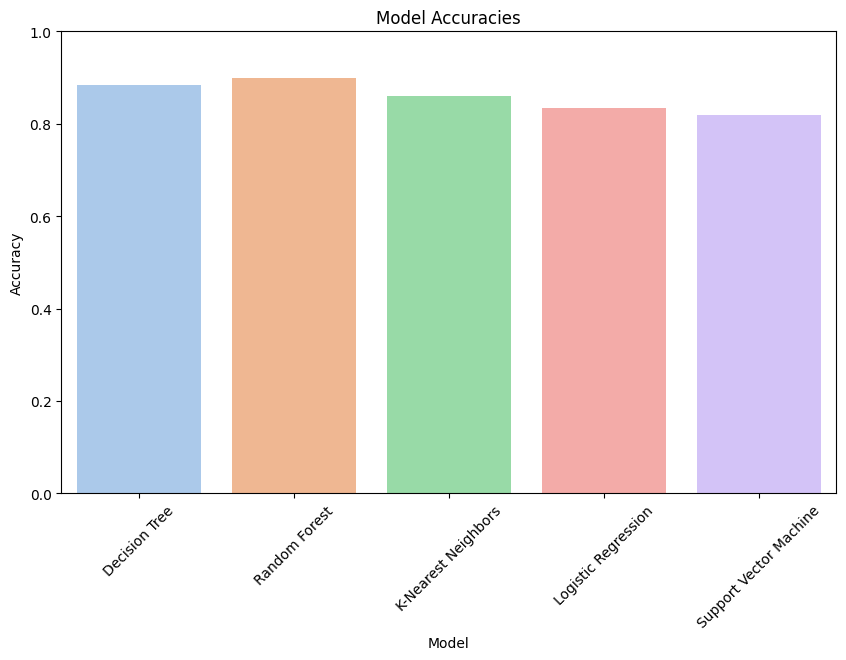

In [48]:
model_names = []
accuracies = []

# Train and evaluate each model
for name, clf in models.items():
    clf.fit(X_train_resampled, y_train_resampled)
    score = clf.score(X_test, y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f"{name} accuracy: {score:.2f}")

# Create a DataFrame for model accuracies
df_models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Plot model accuracies using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df_models, palette='pastel')
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

In [49]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Trains and evaluates a classification model.
    
    Parameters:
        model: The classification model to evaluate.
        X_train, X_test: Feature sets for training and testing.
        y_train, y_test: Labels for training and testing.
    
    Outputs:
        - Accuracy score
        - Classification report (Precision, Recall, F1-score)
        - Confusion matrix plot
    """
    
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nModel: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.2f}\n")
    
    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["0(Rejected)", "1(Approved)"], yticklabels=["0(Rejected)", "1(Approved)"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model.__class__.__name__}')
    plt.show()


Model: RandomForestClassifier
Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93     10500
           1       0.73      0.88      0.79      3000

    accuracy                           0.90     13500
   macro avg       0.84      0.89      0.86     13500
weighted avg       0.91      0.90      0.90     13500



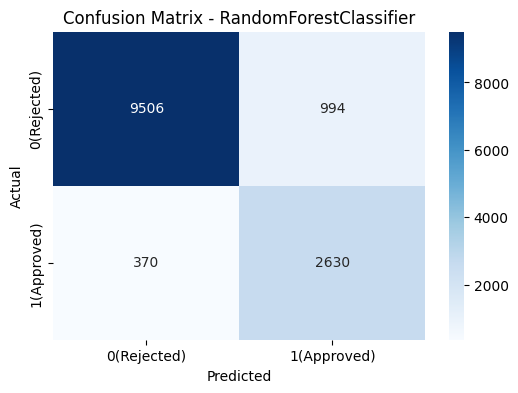


Model: RandomForestClassifier
Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93     10500
           1       0.73      0.87      0.80      3000

    accuracy                           0.90     13500
   macro avg       0.85      0.89      0.87     13500
weighted avg       0.91      0.90      0.90     13500



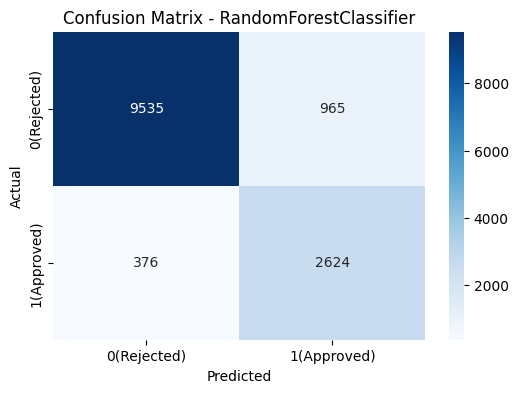

In [50]:
rf_model = RandomForestClassifier()
evaluate_model(rf_model, X_train, X_test, y_train, y_test)
evaluate_model(rf_model, X_train_resampled, X_test, y_train_resampled, y_test)


Model: LogisticRegression
Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88     10500
           1       0.58      0.92      0.71      3000

    accuracy                           0.83     13500
   macro avg       0.78      0.86      0.80     13500
weighted avg       0.88      0.83      0.84     13500



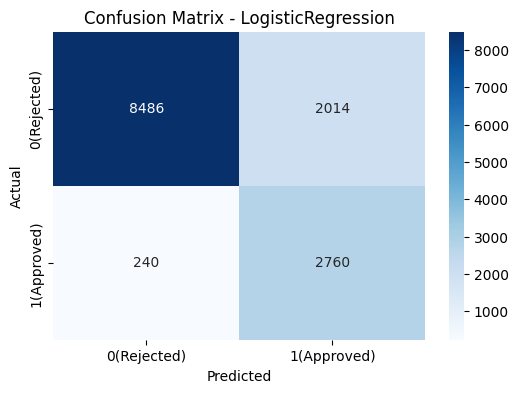

In [51]:
logistic_model = LogisticRegression()
evaluate_model(logistic_model, X_train, X_test, y_train, y_test)

# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#2a9199; overflow:hidden"><b> Hyperparameter Tuning </b></div>

In [52]:
# define parameter grids for all models 
param_grids = {
    'Logistic Regression': {
        'penalty': ['l1', 'l2'],
        'C': np.logspace(-4, 4, 10),  # 10 values in log scale
        'max_iter': [100, 2000, 3500, 4000],
        'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
    },

    'Decision Tree':{
        'max_depth':[10, 20, 30],
        'min_samples_split': [3, 5, 10],
        'min_samples_leaf': [1,2,3],
        'criterion': ['gini', 'entropy']  # split criteria
    },

    'Random Forest':{
        'n_estimators' : [10, 20, 30,],
        'max_depth':[10, 20, 30],
        'min_samples_split': [3, 5, 10],
        'min_samples_leaf': [1,2,3]
    },
    
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }
}

#define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
}

🚀 Performing RandomizedSearchCV for Logistic Regression...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
✅ Best parameters for Logistic Regression: {'solver': 'saga', 'penalty': 'l1', 'max_iter': 100, 'C': 0.005994842503189409}
🔥 Best cross-validation accuracy: 0.861
⏱️ Time taken: 41.01 seconds

🚀 Performing RandomizedSearchCV for Random Forest...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
✅ Best parameters for Random Forest: {'n_estimators': 30, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 30}
🔥 Best cross-validation accuracy: 0.916
⏱️ Time taken: 61.69 seconds

🚀 Performing RandomizedSearchCV for K-Nearest Neighbors...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
✅ Best parameters for K-Nearest Neighbors: {'weights': 'uniform', 'p': 1, 'n_neighbors': 3}
🔥 Best cross-validation accuracy: 0.889
⏱️ Time taken: 9.22 seconds

🚀 Performing RandomizedSearchCV for Decision Tree...
Fitting 5 folds for each of 50 candidates, to

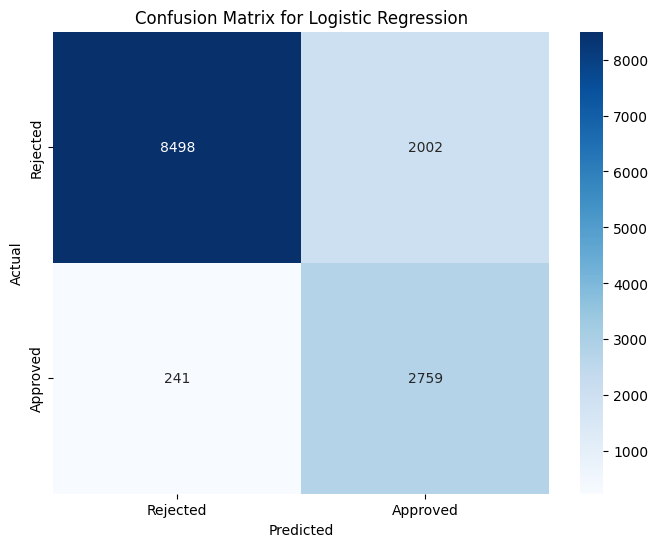


🚀 Evaluating Random Forest...
✅ Accuracy: 0.8981
🔥 F1-score: 0.8627

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93     10500
           1       0.72      0.88      0.79      3000

    accuracy                           0.90     13500
   macro avg       0.84      0.89      0.86     13500
weighted avg       0.91      0.90      0.90     13500



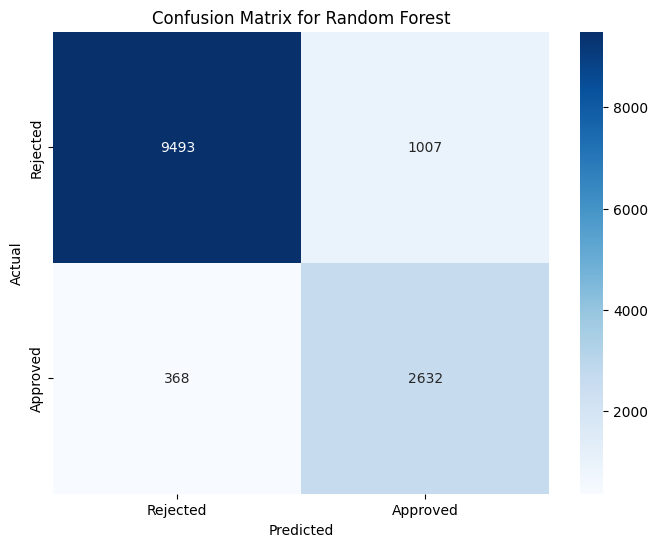


🚀 Evaluating K-Nearest Neighbors...
✅ Accuracy: 0.8670
🔥 F1-score: 0.8203

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     10500
           1       0.67      0.80      0.73      3000

    accuracy                           0.87     13500
   macro avg       0.80      0.84      0.82     13500
weighted avg       0.88      0.87      0.87     13500



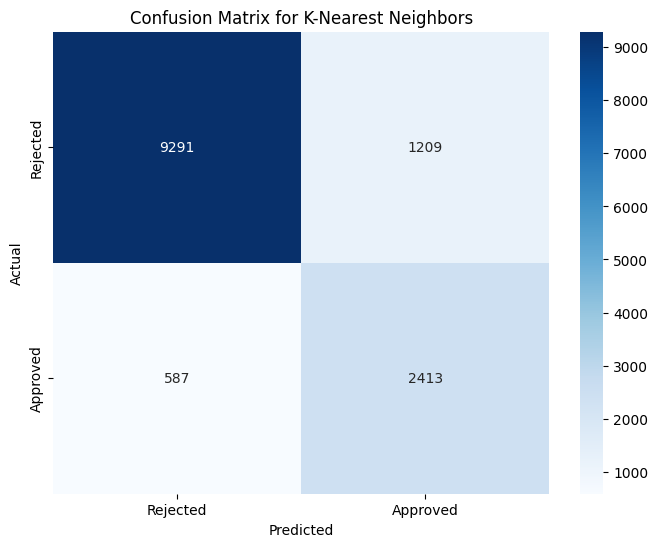


🚀 Evaluating Decision Tree...
✅ Accuracy: 0.8823
🔥 F1-score: 0.8406

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92     10500
           1       0.70      0.83      0.76      3000

    accuracy                           0.88     13500
   macro avg       0.82      0.87      0.84     13500
weighted avg       0.89      0.88      0.89     13500



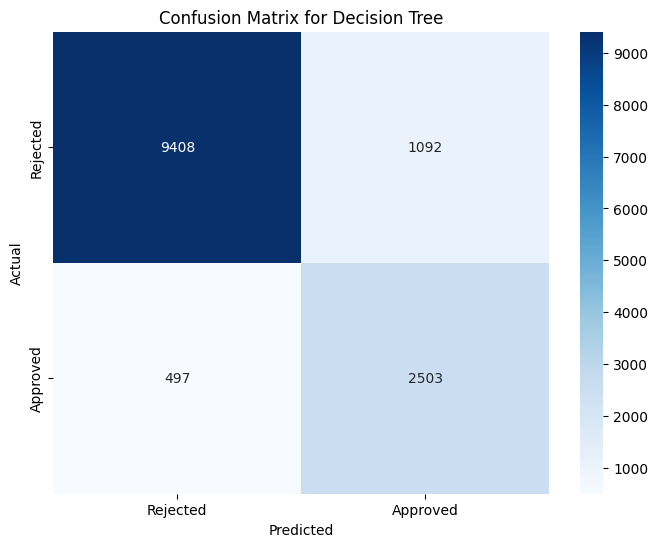

In [53]:
# Store best models in a dictionary
best_models = {}

# RandomizedSearchCV for each model
for name, model in models.items():
    print(f"🚀 Performing RandomizedSearchCV for {name}...")

    # Start the timer
    start_time = time.time()

    # RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids[name],
        n_iter=50,  # Reduce number of searches for faster results
        cv=5,
        scoring='accuracy',
        verbose=1,
        n_jobs=-1,
        random_state=42
    )
    
    # Fit the model
    random_search.fit(X_train_resampled, y_train_resampled)

    # Store the best model
    best_models[name] = random_search.best_estimator_

    # Display best parameters and score
    print(f"✅ Best parameters for {name}: {random_search.best_params_}")
    print(f"🔥 Best cross-validation accuracy: {random_search.best_score_:.3f}")
    
    # Measure time taken
    end_time = time.time()
    print(f"⏱️ Time taken: {end_time - start_time:.2f} seconds\n")

# ✅ Evaluate the best models on the test set
print("\n📊 Model Evaluation on Test Set:")
for name, best_model in best_models.items():
    print(f"\n🚀 Evaluating {name}...")
    
    # Make predictions
    y_pred = best_model.predict(X_test)

    # Accuracy and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"✅ Accuracy: {accuracy:.4f}")
    print(f"🔥 F1-score: {f1:.4f}")

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Rejected', 'Approved'], 
                yticklabels=['Rejected', 'Approved'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [54]:
X_train.shape, X_train_resampled.shape

((31500, 5), (49000, 5))

In [ ]:
svc_param_grid = {
    'C': [0.1]
}

svc_model = SVC(random_state=42)

print("🚀 Performing RandomizedSearchCV for SVC...")

start_time = time.time()

svc_random_search = RandomizedSearchCV(
    estimator=svc_model,
    param_distributions=svc_param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    random_state=42,
)

# Fit the model

svc_random_search.fit(X_train[0:30000], y_train[:30000] )
print(f"✅ Best parameters for SVC: {svc_random_search.best_params_}")
print(f"🔥 Best cross-validation accuracy: {svc_random_search.best_score_:.3f}")

end_time = time.time()
print(f"⏱️ Time taken: {end_time - start_time:.2f} seconds")

🚀 Performing RandomizedSearchCV for SVC...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
✅ Best parameters for SVC: {'C': 0.1}
🔥 Best cross-validation accuracy: 0.866
⏱️ Time taken: 90.16 seconds
